In [31]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import os
from cleaning_utils import *
import numpy as np
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
cwd = os.getcwd()
df = pd.read_csv(os.path.join(cwd, "MetObjects.txt"))

mike_col_list = [i for i in range(0, df.shape[1], 3)]
mike_df = df.iloc[:, mike_col_list]
mike_df = mike_df.astype(str, errors="ignore")

artist_col_list = list(range(16, 28)) # making list of column index from Q->AB
artist_col_list.insert(0, 0) # Adding the first column as index
artist_df = df.iloc[: , artist_col_list] #subsets originas dataframe 'df'
artist_df = split_rows(artist_df)

mike_artist_cols = [i for i in range(3, artist_df.shape[1], 3)]
mike_artist_df = artist_df.iloc[:, mike_artist_cols]

df = clean_mikes_data(df)

C:\Users\mschm\AppData\Local\Temp\ipykernel_4016\3672644094.py:2: DtypeWarning: Columns (5,7,10,11,12,13,14,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(cwd, "MetObjects.txt"))


In [9]:
regional_text_list = []
for col in ['City', 'State', 'County', 'Country', 'Region', 'Subregion', 'Locale', 'Locus']:
    regional_text_list.extend(df[col].tolist())

regional_text = ""
for text in regional_text_list:
    text = str(text)
    if text != 'nan':
        regional_text = regional_text + " " + text

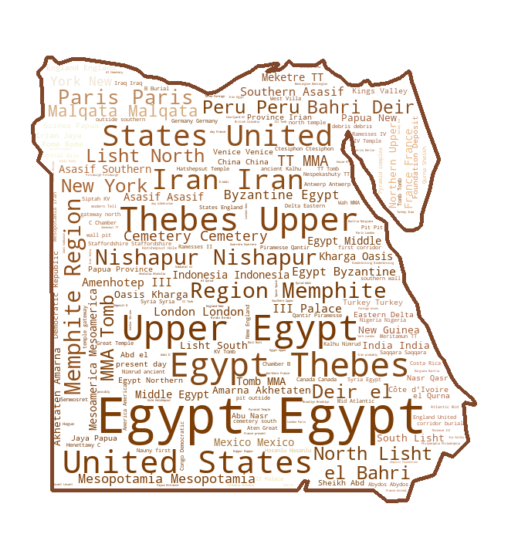

In [37]:
egypt_mask = np.array(Image.open('egypt.png'))

eqypt_colors = ImageColorGenerator(np.array(Image.open('egypt_colors.jpg')))
wc = WordCloud(mask=egypt_mask, background_color="white",contour_color='#80472a',contour_width=5, width=1280, height=1410, color_func=eqypt_colors)
wc.generate(regional_text)
plt.figure( figsize=(20,10) )

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
mask = np.array(Image.open('path/to/image'))
wc = WordCloud(stopwords=STOPWORDS, font_path=font_path,
               mask=mask, background_color="white",
               max_words=2000, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0])
wc.generate(article.text)
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()